# A simple machine learning model that will convert from degrees celsius to fahrenheit with machine learning rather than the formula 

 f = 1.8*c + 32.

Following https://classroom.udacity.com/courses/ud187/lessons/e0c70c77-5584-4f83-a47b-a67a6172ae75/concepts/fe91023e-9699-418a-8f4e-58c6acad1169
### This notebook explains the code well:
https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb#scrollTo=m8YQN1H41L-Y

In [0]:
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()


In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for index, element in enumerate(celsius_q):
  print("{} Celsius = {} Fahrenheit".format(element, fahrenheit_a[index]))

-40.0 Celsius = -40.0 Fahrenheit
-10.0 Celsius = 14.0 Fahrenheit
0.0 Celsius = 32.0 Fahrenheit
8.0 Celsius = 46.0 Fahrenheit
15.0 Celsius = 59.0 Fahrenheit
22.0 Celsius = 72.0 Fahrenheit
38.0 Celsius = 100.0 Fahrenheit


In [0]:
layer_0 = tf.keras.layers.Dense(1, input_shape = [1])
model = tf.keras.Sequential([layer_0])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500,  verbose=False)
print("{} done training!".format("I am "))
#   We trained it with 3500 examples (7 pairs, over 500 epochs).


I am  done training!


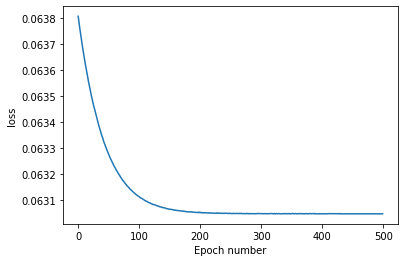

In [8]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch number")
plt.ylabel("loss") #error, difference btwn actual and predicted result
plt.plot(history.history['loss'])


### Now will try to use my trained model to predict fehrenheit from Celsius

*The* correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

In [9]:
print(model.predict([100.0]))

[[211.74744]]


In [10]:
print("These are the layer variables: {}".format(layer_0.get_weights()))

These are the layer variables: [array([[1.7979496]], dtype=float32), array([31.952477], dtype=float32)]


## From the udacity notebook: 
The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.T

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.